In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

import os

%matplotlib inline

datos_path = "Data"
clientes_file = "Clientes_train.csv"
zonas_file = "Zonas.csv"

clientes = pd.read_csv(clientes_file)
zonas = pd.read_csv(zonas_file)

datos = pd.merge(clientes, zonas, on="ID_Zona", how="inner")

targets = datos["Seguro_Vivienda"]
variables = datos.drop(["Seguro_Vivienda"], axis=1, inplace=False)
#variables

In [4]:
variables2 = variables.groupby(['ID_Cliente'])['ID_Cliente'].count()
#la idea es dejar númerico los campos ID_Cliente y ID_Zona. Además normalizar a dato numerico la columna sexo
#columnas = ['ID_Cliente', 'ID_Zona']
#variables[columnas] = variables[columnas].replace({'Z,C',:''}, regex=True)
#Forma Col-Col
variables["ID_Cliente"] = variables["ID_Cliente"].replace({'C':''}, regex=True)
variables["ID_Zona"] = variables["ID_Zona"].replace({'Z':''}, regex=True)

variables

,ID_Cliente,Fecha_Nacimiento,Fecha_Alta,Sexo,ID_Zona,Productos_Vida,Productos_Vehiculos,Productos_Otros,Gasto_Vida,Gasto_Vehiculos,...,Poblacion_Funcionario,Poblacion_Trabajador_Cualificado,Poblacion_Trabajador_No_Cualificado,Vivienda_Propiedad,Vivienda_Alquiler,Medico_Seguro_Privado,Medico_Seguridad_Social,Ingresos_Mas_De_40000,Ingresos_De_20000_Hasta_40000,Ingresos_Hasta_20000
0,3088,29/03/1968,27/03/1989,Mujer,1143,0,1,0,0.00,617.55,...,28.17,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.30
1,3441,01/05/1962,26/12/1984,Hombre,1143,0,0,0,0.00,0.00,...,28.17,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.30
2,0412,19/01/1967,29/04/1987,Hombre,1143,0,0,1,0.00,0.00,...,28.17,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.30
3,3565,20/04/1948,06/09/1969,Hombre,1143,0,1,0,0.00,3315.54,...,28.17,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.30
4,0315,28/07/1979,18/06/2001,Mujer,1143,0,1,2,0.00,2561.45,...,28.17,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,3039,22/06/1985,09/04/2006,Hombre,0006,0,0,0,0.00,0.00,...,68.49,0.00,0.00,100.00,0.00,31.89,68.11,0.00,0.00,100.00
2923,2696,30/03/1981,10/09/2002,Hombre,0938,0,0,0,0.00,0.00,...,15.74,22.97,46.50,100.00,0.00,42.53,57.47,0.00,50.54,49.46
2924,2191,22/04/1958,30/11/1979,Hombre,0787,0,1,0,0.00,3586.77,...,15.65,0.00,84.35,91.02,8.98,15.08,84.92,0.00,3.23,96.77
2925,0959,13/12/1980,29/02/2004,Mujer,1424,1,0,2,181.56,1968.15,...,83.10,6.66,6.78,91.91,8.09,31.24,68.76,0.00,0.00,100.00


In [5]:
#variables2 = variables.groupby(['Sexo'])['Sexo'].count()
#variables2
categorica=variables.filter(["Sexo"])
categorica.iloc[:,0]
#mujer = 1
#hombre = 0
#usamos get_dummies
cat_variables=pd.get_dummies(categorica.iloc[:,0], drop_first="true")
cat_variables
variables=pd.concat([variables,cat_variables],axis=1)
variables
variables2 = variables.drop(columns = ['Sexo'])
variables=variables2.rename({'Mujer': 'Sexo'}, axis=1)
variables.head()

,ID_Cliente,Fecha_Nacimiento,Fecha_Alta,ID_Zona,Productos_Vida,Productos_Vehiculos,Productos_Otros,Gasto_Vida,Gasto_Vehiculos,Gasto_Otros,...,Poblacion_Trabajador_Cualificado,Poblacion_Trabajador_No_Cualificado,Vivienda_Propiedad,Vivienda_Alquiler,Medico_Seguro_Privado,Medico_Seguridad_Social,Ingresos_Mas_De_40000,Ingresos_De_20000_Hasta_40000,Ingresos_Hasta_20000,Sexo
0,3088,29/03/1968,27/03/1989,1143,0,1,0,0.0,617.55,0.00,...,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.3,1
1,3441,01/05/1962,26/12/1984,1143,0,0,0,0.0,0.00,0.00,...,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.3,0
2,0412,19/01/1967,29/04/1987,1143,0,0,1,0.0,0.00,197.14,...,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.3,0
3,3565,20/04/1948,06/09/1969,1143,0,1,0,0.0,3315.54,0.00,...,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.3,0
4,0315,28/07/1979,18/06/2001,1143,0,1,2,0.0,2561.45,176.94,...,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.3,1


In [6]:
#Convertir variables en entero
variables['Sexo'] = variables['Sexo'].astype('int64', copy=False)
if variables['ID_Cliente'].str.isnumeric().all():
    # Convertir la columna en tipo entero
    variables['ID_Cliente'] = variables['ID_Cliente'].astype('int64', copy=False)
else:
    print("No todos los valores en la columna ID_Cliente son números enteros.")

In [7]:
if variables['ID_Zona'].str.isnumeric().all():
    # Convertir la columna en tipo entero
    variables['ID_Zona'] = variables['ID_Zona'].astype('int64', copy=False)
else:
    print("No todos los valores en la columna ID_Zona son números enteros.")
#variables.info()

In [8]:
variables['Fecha_Nacimiento'] = pd.to_datetime(variables['Fecha_Nacimiento'], format='%d/%m/%Y')
variables['Fecha_Alta'] = pd.to_datetime(variables['Fecha_Alta'], format='%d/%m/%Y')

# con la fecha actual tener los campos fechas en edades para un mejor analisis
now = datetime.datetime.now()
variables['Edad'] = (now - variables['Fecha_Nacimiento']).astype('<m8[Y]')
variables['Edad_Alta'] = (variables['Fecha_Alta'] - variables['Fecha_Nacimiento']).astype('<m8[Y]')
variables['Edad'] = variables['Edad'].astype('int64', copy=False)
variables['Edad_Alta'] = variables['Edad_Alta'].astype('int64', copy=False)


In [9]:
df = variables.drop(columns = ['Fecha_Nacimiento','Fecha_Alta'])
df.head()

,ID_Cliente,ID_Zona,Productos_Vida,Productos_Vehiculos,Productos_Otros,Gasto_Vida,Gasto_Vehiculos,Gasto_Otros,Tipo_Familia,Tipo_Pareja,...,Vivienda_Propiedad,Vivienda_Alquiler,Medico_Seguro_Privado,Medico_Seguridad_Social,Ingresos_Mas_De_40000,Ingresos_De_20000_Hasta_40000,Ingresos_Hasta_20000,Sexo,Edad,Edad_Alta
0,3088,1143,0,1,0,0.0,617.55,0.00,75.1,18.27,...,71.34,28.66,32.77,67.23,2.23,1.47,96.3,1,54,20
1,3441,1143,0,0,0,0.0,0.00,0.00,75.1,18.27,...,71.34,28.66,32.77,67.23,2.23,1.47,96.3,0,60,22
2,412,1143,0,0,1,0.0,0.00,197.14,75.1,18.27,...,71.34,28.66,32.77,67.23,2.23,1.47,96.3,0,56,20
3,3565,1143,0,1,0,0.0,3315.54,0.00,75.1,18.27,...,71.34,28.66,32.77,67.23,2.23,1.47,96.3,0,74,21
4,315,1143,0,1,2,0.0,2561.45,176.94,75.1,18.27,...,71.34,28.66,32.77,67.23,2.23,1.47,96.3,1,43,21


## Selección de Variables

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2 = SelectKBest(chi2, k=10).fit(df._get_numeric_data(), targets)
for (col, sel) in zip(df._get_numeric_data().columns.values, chi2.get_support()):
    if sel:
        print(col)
seleccion = chi2.transform(df._get_numeric_data())
seleccion

ID_Zona
Gasto_Vida
Gasto_Vehiculos
Gasto_Otros
Educacion_Superior
Educacion_Baja
Poblacion_Empresario
Vivienda_Propiedad
Vivienda_Alquiler
Medico_Seguro_Privado


array([[1143.  ,    0.  ,  617.55, ...,   71.34,   28.66,   32.77],
       [1143.  ,    0.  ,    0.  , ...,   71.34,   28.66,   32.77],
       [1143.  ,    0.  ,    0.  , ...,   71.34,   28.66,   32.77],
       ...,
       [ 787.  ,    0.  , 3586.77, ...,   91.02,    8.98,   15.08],
       [1424.  ,  181.56, 1968.15, ...,   91.91,    8.09,   31.24],
       [ 869.  ,    0.  ,  630.98, ...,   92.91,    7.09,   58.08]])

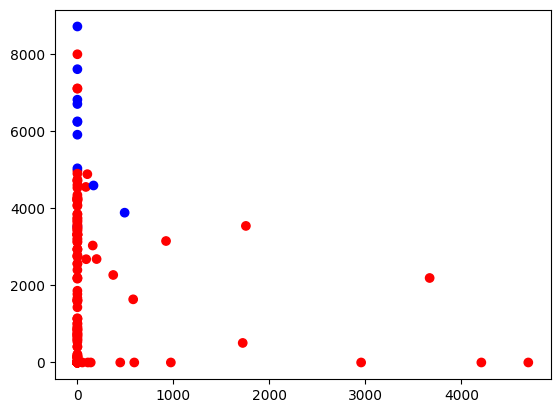

In [13]:
from matplotlib.colors import ListedColormap

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(seleccion[1:200, 1], seleccion[1:200, 2], c=targets[1:200], cmap=cm_bright)
plt.show()

In [14]:
print(seleccion.shape)

(2927, 10)


In [15]:
# Creando nuevo dataframe 
df = pd.DataFrame(data=seleccion, columns=['ID_Zona', 'Gasto_Vida', 'Gasto_Vehiculos', 'Gasto_Otros', 'Educacion_Superior', 'Educacion_Baja', 'Poblacion_Empresario', 'Vivienda_Propiedad', 'Vivienda_Alquiler', 'Medico_Seguro_Privado'])
df


,ID_Zona,Gasto_Vida,Gasto_Vehiculos,Gasto_Otros,Educacion_Superior,Educacion_Baja,Poblacion_Empresario,Vivienda_Propiedad,Vivienda_Alquiler,Medico_Seguro_Privado
0,1143.0,0.00,617.55,0.00,2.75,58.05,23.70,71.34,28.66,32.77
1,1143.0,0.00,0.00,0.00,2.75,58.05,23.70,71.34,28.66,32.77
2,1143.0,0.00,0.00,197.14,2.75,58.05,23.70,71.34,28.66,32.77
3,1143.0,0.00,3315.54,0.00,2.75,58.05,23.70,71.34,28.66,32.77
4,1143.0,0.00,2561.45,176.94,2.75,58.05,23.70,71.34,28.66,32.77
...,...,...,...,...,...,...,...,...,...,...
2922,6.0,0.00,0.00,0.00,31.15,0.00,31.51,100.00,0.00,31.89
2923,938.0,0.00,0.00,0.00,52.02,0.00,14.79,100.00,0.00,42.53
2924,787.0,0.00,3586.77,0.00,0.00,74.45,0.00,91.02,8.98,15.08
2925,1424.0,181.56,1968.15,542.46,41.44,8.54,3.46,91.91,8.09,31.24


## Transformación de variables 
### por PCA del dataframe posterior a la selección de variables


In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(df._get_numeric_data())
print(pca.components_)
print(pca.explained_variance_ratio_)
transformacion = pca.transform(df._get_numeric_data())
print(transformacion.shape)

[[-7.73111718e-05  3.07640697e-03  9.98927056e-01  4.61099578e-02
   4.74636237e-04 -4.36254159e-04  7.76234299e-04  1.92573095e-03
  -1.92573095e-03  8.38740934e-04]
 [ 2.10875402e-02  1.40525006e-02 -4.61611990e-02  9.98572373e-01
  -3.13298127e-04  9.11971765e-05  1.61199365e-03  6.13553827e-03
  -6.13553827e-03  1.48567449e-03]
 [ 9.99028958e-01 -1.61328214e-02  1.00308456e-03 -2.10610963e-02
   1.00584124e-02 -1.63573796e-02  1.10508977e-02  1.65309007e-02
  -1.65309007e-02  1.41031532e-02]
 [ 1.56332439e-02  9.99750547e-01 -2.42306090e-03 -1.45573439e-02
   9.05567469e-04 -2.80067912e-03  1.36688863e-03  3.41364279e-03
  -3.41364279e-03  1.67932244e-03]
 [-3.16534136e-02 -5.39394302e-03 -2.62439788e-03 -8.01252609e-03
   1.30915116e-01 -1.91668453e-01  1.96403418e-01  6.55214913e-01
  -6.55214913e-01  2.18711790e-01]
 [-1.57037802e-02 -1.29444965e-03 -2.23125393e-04  2.41027024e-03
   3.59406557e-01 -6.27618124e-01  4.14724426e-01 -2.59123650e-01
   2.59123650e-01  4.12773294e-01

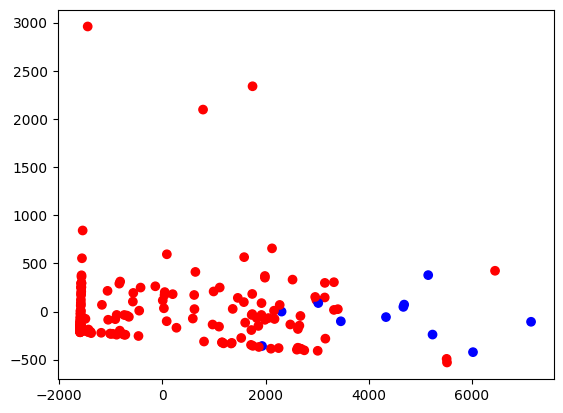

In [17]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(transformacion[1:200, 0], transformacion[1:200, 1], c=targets[1:200], cmap=cm_bright)
plt.show()

Reducir el número de variables puede ser beneficioso en términos de eficiencia computacional y también puede ayudar a evitar el sobreajuste en algunos casos. Sin embargo, es importante tener en cuenta que una reducción drástica del número de variables puede llevar a una pérdida de información importante y, en última instancia, a un rendimiento del modelo inferior. Por lo tanto, la elección del número óptimo de variables seleccionadas depende del conjunto de datos específico y del modelo que se esté utilizando. Es importante realizar pruebas y comparar el rendimiento del modelo utilizando diferentes números de variables seleccionadas para determinar el número óptimo para un problema específico.

Probar con cambiar el numero de variables una vez el modelo sea entrenado y buscar mayor eficiencia > 90 %

In [18]:
df_T = pd.DataFrame(data=transformacion, columns=['ID_Zona', 'Gasto_Vida', 'Gasto_Vehiculos', 'Gasto_Otros', 'Educacion_Superior', 'Educacion_Baja', 'Poblacion_Empresario', 'Vivienda_Propiedad', 'Vivienda_Alquiler', 'Medico_Seguro_Privado'])
df_T

,ID_Zona,Gasto_Vida,Gasto_Vehiculos,Gasto_Otros,Educacion_Superior,Educacion_Baja,Poblacion_Empresario,Vivienda_Propiedad,Vivienda_Alquiler,Medico_Seguro_Privado
0,-977.411500,-221.983645,328.466505,-25.656100,16.009394,-20.255059,8.251716,3.941678,-8.425681,1.849488e-14
1,-1594.298903,-193.476796,327.847050,-24.159739,17.630091,-20.117268,8.398645,3.905978,-8.377542,3.092938e-14
2,-1585.208786,3.381761,323.695066,-27.029574,16.050502,-19.642107,8.204608,3.917041,-8.222419,2.915302e-14
3,1717.683708,-346.526098,331.172817,-32.193494,8.928795,-20.857049,7.609804,4.097649,-8.635995,-3.479582e-14
4,972.561500,-135.029004,326.689851,-32.942065,9.490091,-20.262319,7.615064,4.063984,-8.437983,-2.058497e-14
...,...,...,...,...,...,...,...,...,...,...
2922,-1594.056489,-217.104550,-805.792222,-41.541572,107.362729,32.401098,-33.919700,0.844735,-1.964337,1.294330e-15
2923,-1594.122692,-197.468646,125.477972,-26.957476,79.637174,22.723706,-35.478617,8.756414,23.774709,2.225787e-15
2924,1988.684319,-366.374198,-24.366082,-38.392299,33.247702,-53.938362,-4.064685,5.555037,2.393700,-4.588158e-14
2925,397.391211,266.034460,597.828378,149.366088,35.444793,1.396181,-40.153045,10.325020,20.756901,-3.693842e-14
